In [10]:
import pandas as pd
import read_msalign

a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/ABBA100_ms2.msalign")

pairs = []
for spec in a_spec_list:
    pairs.append(frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)))

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessA[pair] = spec.header.spec_scan

a_spec_dict = {}
for spec in a_spec_list:
    a_spec_dict[str(spec.header.spec_scan)] = spec

for pair in pairs:
    spec = a_spec_dict[str(accessA[pair])]
    title = int(spec.header.title) % 100000
    spec.header.title = str(spec.header.spec_scan % 100000)
    spec.header.spec_scan = title
    spec.header.spec_id = title
    pre_mz_list = spec.header.pre_mz_list
    pre_charge_list = spec.header.pre_charge_list
    pre_mass_list = spec.header.pre_mass_list
    pre_inte_list = spec.header.pre_inte_list
    pre_id_list = spec.header.pre_id_list

    pre_mz_list[0], pre_mz_list[1] = pre_mz_list[1], pre_mz_list[0]
    pre_charge_list[0], pre_charge_list[1] = pre_charge_list[1], pre_charge_list[0]
    pre_mass_list[0], pre_mass_list[1] = pre_mass_list[1], pre_mass_list[0]
    pre_inte_list[0], pre_inte_list[1] = pre_inte_list[1], pre_inte_list[0]
    pre_id_list[0], pre_id_list[1] = pre_id_list[1], pre_id_list[0]

    spec.header.pre_mz_list = pre_mz_list
    spec.header.pre_charge_list = pre_charge_list
    spec.header.pre_mass_list = pre_mass_list
    spec.header.pre_inte_list = pre_inte_list
    spec.header.pre_id_list = pre_id_list

output_spec_list = read_msalign.sortScans(a_spec_list)

read_msalign.write_spec_file("fixed_ms2.msalign", output_spec_list)


In [29]:
import pandas as pd
import read_msalign

a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/A_ms2.msalign")

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result.tsv", delimiter="\t")

pairs = []
for spec in a_spec_list:
    pairs.append(frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)))

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessA[pair] = spec.header.spec_scan

fulltable = result.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])

import json
import random

random.seed(0)

fulllist = fulltable.get_group(("A", "B", "B", "A"))["Pair"].to_list()

dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_html/toppic_prsm_cutoff/data_js/prsms/prsm"

reference = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")

a_spec_dict = {}
for spec in a_spec_list:
    a_spec_dict[int(spec.header.spec_scan)] = spec

percentage = 1.0

outputList = []

for pair in fulllist:
    spec = a_spec_dict[accessA[eval(pair)]]
    curr_peak_list = spec.peak_list
    currecscore = 1
    for idx in range(0, len(curr_peak_list)):
        if currecscore >= curr_peak_list[idx].ecscore:
            currecscore = curr_peak_list[idx].ecscore
        else:
            break
    a_peaks = curr_peak_list[0:idx]
    b_peaks = curr_peak_list[idx:]
    if (len(a_spec_list) == len(curr_peak_list)):
        print("wtf something is wrong and scan is " + spec.header.spec_scan)

    prsmID = reference[reference["Scan(s)"] == int(spec.header.title)].iloc[0]["Prsm ID"]
    b_matched = []
    b_non_matched = []
    with open(dir + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        b_peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        for idx in range(0, len(b_peak_list)):
            if "matched_ions" in b_peak_list[idx]:
                b_matched.append(idx)
            else:
                b_non_matched.append(idx)

    b_random_idx = sorted(random.sample(b_matched, int(len(b_matched) * (1 - percentage))) + random.sample(b_non_matched, int(len(b_non_matched) * (1 - percentage))))

    for idx in b_random_idx:
        a_peaks.append(b_peaks[idx])

    spec.peak_list = a_peaks

    outputList.append(spec)

read_msalign.write_spec_file("ABBA" + str(int(percentage*100)) + "_ms2.msalign", a_spec_list)

1906
128


<Axes: >

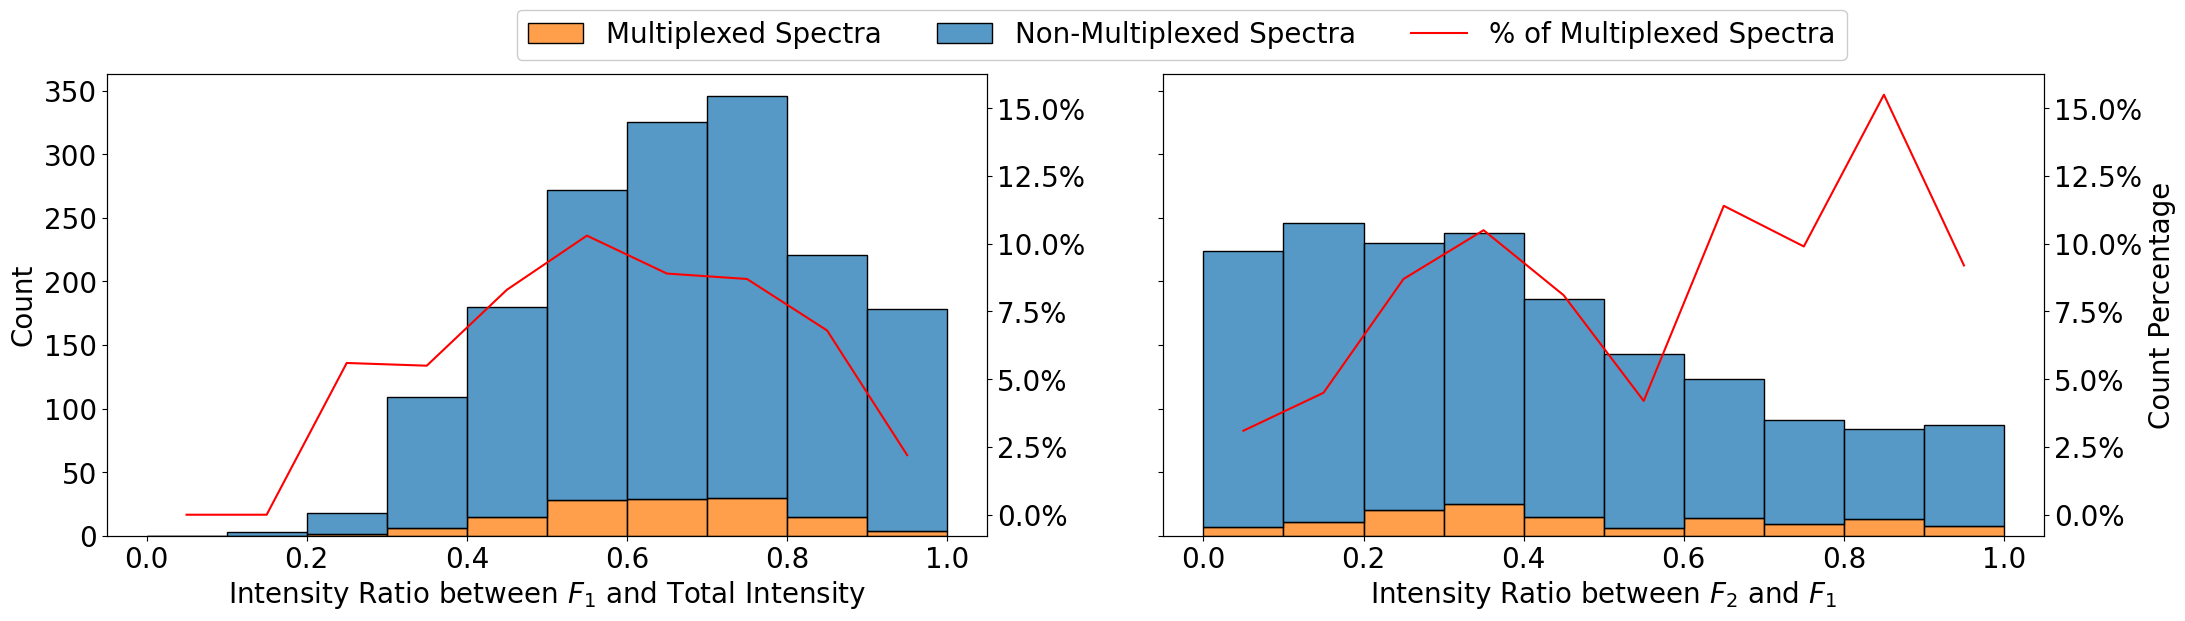

In [18]:
import read_msalign
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2.msalign")

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Multiplex/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")

temp = r1.merge(r2, how="outer", on=["Scan(s)"])
print(temp.shape[0])
merge = r1.merge(r2, how="inner", on=["Scan(s)"])
print(merge.shape[0])

fig, (ax0, ax2) = plt.subplots(1, 2, figsize=(25, 6), sharex=True, sharey=True)

r1scanlist = r1["Scan(s)"].tolist()
r2scanlist = r2["Scan(s)"].tolist()
mergescanlist = merge["Scan(s)"].tolist()
#or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0)
intensity_percent = []
merged_percent = []
for spec in spec_list:
    if spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0):
        continue
    if not ((spec.header.spec_scan in r1scanlist or spec.header.spec_scan in r2scanlist)):
        continue
    total = sum(map(float, spec.header.pre_inte_list))
    if spec.header.spec_scan in mergescanlist:
        merged_percent.append(float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]))
    else:
        intensity_percent.append(float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]) )

df = pd.DataFrame(columns=["Intensity Ratio between $F_2$ and $F_1$", "Type of Spectra"])
for num in intensity_percent:
    df.loc[len(df)] = [num, "Spectra with at least 2 Features"]

for num in merged_percent:
    df.loc[len(df)] = [num, "Multiplexed Spectra"]

plt.rcParams.update({'font.size': 20})

ax1 = ax0.twinx()
ax3 = ax2.twinx()

# share the secondary axes
ax1.sharey(ax3)
sns.histplot(data=df, x="Intensity Ratio between $F_2$ and $F_1$", hue="Type of Spectra", multiple="stack", stat="count", binwidth=0.1, binrange=(0, 1), label="435", legend=False, ax=ax2)

labels = [int(v) if v else 0 for v in ax2.containers[0].datavalues]
labelsnon = [int(v) if v else 0 for v in ax2.containers[1].datavalues]
total = [sum(x) for x in zip(labels, labelsnon)]
result = [round((x / y) * 100, 1) if not y == 0 else 0 for x,y in zip(labels, total)]

sns.lineplot(x=[x / 100.0 + 0.05 for x in range(0, 100, 10)], y=result, ax=ax3, color="red", label="% of Multiplexed Spectra", legend=False)

ax3.yaxis.set_major_formatter(mtick.PercentFormatter())

ax3.set_ylabel("Count Percentage")


handles1, labels1 = ax2.get_legend_handles_labels()
handles2, labels2 = ax3.get_legend_handles_labels()
labels1 = ["Multiplexed Spectra", "Non-Multiplexed Spectra"]
ax2.legend(handles1+handles2, 
           [text for text in labels1+labels2], 
           loc='lower left', fancybox=True, framealpha=1, bbox_to_anchor=(-0.75, 1), ncol = 3)


intensity_percent = []
merged_percent = []
for spec in spec_list:
    if spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0):
        continue
    if not ((spec.header.spec_scan in r1scanlist or spec.header.spec_scan in r2scanlist)):
        continue
    total = sum(map(float, spec.header.pre_inte_list))
    if spec.header.spec_scan in mergescanlist:
        merged_percent.append(float(spec.header.pre_inte_list[0]) / total)
    else:
        intensity_percent.append(float(spec.header.pre_inte_list[0]) / total )

df = pd.DataFrame(columns=["Intensity Ratio between $F_1$ and Total Intensity", "Type of Spectra"])
for num in intensity_percent:
    df.loc[len(df)] = [num, "Spectra with at least 2 Features"]

for num in merged_percent:
    df.loc[len(df)] = [num, "Multiplexed Spectra"]

sns.histplot(data=df, x="Intensity Ratio between $F_1$ and Total Intensity", hue="Type of Spectra", multiple="stack", stat="count", binwidth=0.1, binrange=(0, 1), label="435", legend=False, ax=ax0)

labels = [int(v) if v else 0 for v in ax0.containers[0].datavalues]
labelsnon = [int(v) if v else 0 for v in ax0.containers[1].datavalues]
total = [sum(x) for x in zip(labels, labelsnon)]
result = [round((x / y) * 100, 1) if not y == 0 else 0 for x,y in zip(labels, total)]

sns.lineplot(x=[x / 100.0 + 0.05 for x in range(0, 100, 10)], y=result, ax=ax1, color="red", label="% of Multiplexed", legend=False)

In [21]:
import pandas as pd

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation4/FDR_No_Limit/remove_ions_new/Result.tsv", delimiter="\t", index_col=0)

df.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"]).count()

Pair  A+B_1 peaks  A+B_1 E-value  A+B_2 peaks  \
A+B_1 A+B_2 B+A_1 B+A_2                                                  
-     B     B     -         2            2              2            2   
                  A        11           11             11           11   
                  C         1            1              1            1   
A     -     -     A         3            3              3            3   
            A     A         7            7              7            7   
            B     A         2            2              2            2   
            C     A         1            1              1            1   
      B     -     A         2            2              2            2   
            A     -         8            8              8            8   
                  A        86           86             86           86   
                  C         3            3              3            3   
            B     -         2            2              2            2   
                  A      1036         1036           1036         1036   
            C     A         3            3              3            3   
      C     -     A         1            1              1            1   
            A     A         1            1              1            1   
B     -     B     -         2            2              2            2   
                  A         6            6              6            6   
                  C         1            1              1            1   
      A     B     A         2            2              2            2   
      B     B     -         9            9              9            9   
                  A       120          120            120          120   
                  C         4            4              4            4   
      C     B     A         4            4              4            4   
C     B     B     A         4            4              4            4   
                  C         2            2              2            2   

                         A+B_2 E-value  B+A_1 peaks  B+A_1 E-value  \
A+B_1 A+B_2 B+A_1 B+A_2                                              
-     B     B     -                  2            2              2   
                  A                 11           11             11   
                  C                  1            1              1   
A     -     -     A                  3            3              3   
            A     A                  7            7              7   
            B     A                  2            2              2   
            C     A                  1            1              1   
      B     -     A                  2            2              2   
            A     -                  8            8              8   
                  A                 86           86             86   
                  C                  3            3              3   
            B     -                  2            2              2   
                  A               1036         1036           1036   
            C     A                  3            3              3   
      C     -     A                  1            1              1   
            A     A                  1            1              1   
B     -     B     -                  2            2              2   
                  A                  6            6              6   
                  C                  1            1              1   
      A     B     A                  2            2              2   
      B     B     -                  9            9              9   
                  A                120          120            120   
                  C                  4            4              4   
      C     B     A                  4            4              4   
C     B     B     A                  4            4              4   
                  C                  2            2           

In [119]:
import pandas as pd
import csv
import copy

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result_1Peaks.tsv", delimiter="\t")

with open("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result_1Peaks.tsv") as f:
    prsmspeaks = [{k: v for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace=True, delimiter="\t")]
    
prsmsvalue = copy.deepcopy(prsmspeaks)

prsmcombined = copy.deepcopy(prsmspeaks)

In [109]:
#P1 and P2
query = df[(df["A+B_1"] == "B") & (df["A+B_2"] == "B") & (df["B+A_1"] == "B") & (df["B+A_2"] == "A")]

query["#matched peaks"] = query["A+B_1 peaks"] >= query["A+B_2 peaks"]

query["E-value"] = query["A+B_1 E-value"] <= query["A+B_2 E-value"]

query["Difference"] = ~(query["#matched peaks"] == query["E-value"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Difference"]].shape[0])

21 60
17 64
12


/tmp/ipykernel_33159/3165887939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["A+B_1 peaks"] >= query["A+B_2 peaks"]
/tmp/ipykernel_33159/3165887939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["A+B_1 E-value"] <= query["A+B_2 E-value"]
/tmp/ipykernel_33159/3165887939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [110]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_2"] = "-"
    prsmspeaks[idx]["A+B_2 peaks"] = 0
    prsmspeaks[idx]["A+B_2 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_1"] = "-"
    prsmspeaks[idx]["A+B_1 peaks"] = 0
    prsmspeaks[idx]["A+B_1 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_2"] = "-"
    prsmsvalue[idx]["A+B_2 peaks"] = 0
    prsmsvalue[idx]["A+B_2 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_1"] = "-"
    prsmsvalue[idx]["A+B_1 peaks"] = 0
    prsmsvalue[idx]["A+B_1 E-value"] = 1

In [105]:
#P3 and P4
query = df[(df["A+B_1"] == "A") & (df["A+B_2"] == "B") & (df["B+A_1"] == "A") & (df["B+A_2"] == "A")]

query["#matched peaks"] = query["B+A_1 peaks"] >= query["B+A_2 peaks"]

query["E-value"] = query["B+A_1 E-value"] <= query["B+A_2 E-value"]

query["Difference"] = ~(query["#matched peaks"] == query["E-value"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Difference"]].shape[0])

26 58
22 62
10


/tmp/ipykernel_33159/2239245553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["B+A_1 peaks"] >= query["B+A_2 peaks"]
/tmp/ipykernel_33159/2239245553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["B+A_1 E-value"] <= query["B+A_2 E-value"]
/tmp/ipykernel_33159/2239245553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [106]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_2"] = "-"
    prsmspeaks[idx]["B+A_2 peaks"] = 0
    prsmspeaks[idx]["B+A_2 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_1"] = "-"
    prsmspeaks[idx]["B+A_1 peaks"] = 0
    prsmspeaks[idx]["B+A_1 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_2"] = "-"
    prsmsvalue[idx]["B+A_2 peaks"] = 0
    prsmsvalue[idx]["B+A_2 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_1"] = "-"
    prsmsvalue[idx]["B+A_1 peaks"] = 0
    prsmsvalue[idx]["B+A_1 E-value"] = 1

In [126]:
#P1 and P4
query = df[(df["A+B_1"] == "B") & (df["A+B_2"] == "-") & (df["B+A_1"] == "B") & (df["B+A_2"] == "A")]

query["#matched peaks"] = query["A+B_1 peaks"] >= query["B+A_2 peaks"]

query["E-value"] = query["A+B_1 E-value"] <= query["B+A_2 E-value"]

query["Combined"] = (query["A+B_1 peaks"] + query["A+B_2 peaks"]) >= (query["B+A_1 peaks"] + query["B+A_2 peaks"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Combined"]].shape[0], query[~query["Combined"]].shape[0])

40 0
35 5
0 40


/tmp/ipykernel_33159/1887306537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["A+B_1 peaks"] >= query["B+A_2 peaks"]
/tmp/ipykernel_33159/1887306537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["A+B_1 E-value"] <= query["B+A_2 E-value"]
/tmp/ipykernel_33159/1887306537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [127]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_2"] = "-"
    prsmspeaks[idx]["B+A_2 peaks"] = 0
    prsmspeaks[idx]["B+A_2 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_1"] = "-"
    prsmspeaks[idx]["A+B_1 peaks"] = 0
    prsmspeaks[idx]["A+B_1 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_2"] = "-"
    prsmsvalue[idx]["B+A_2 peaks"] = 0
    prsmsvalue[idx]["B+A_2 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_1"] = "-"
    prsmsvalue[idx]["A+B_1 peaks"] = 0
    prsmsvalue[idx]["A+B_1 E-value"] = 1

In [134]:
#P2 and P3
query = df[(df["A+B_1"] == "A") & (df["A+B_2"] == "B") & (df["B+A_1"] == "A") & (df["B+A_2"] == "-")]

query["#matched peaks"] = query["A+B_2 peaks"] >= query["B+A_1 peaks"]

query["E-value"] = query["A+B_2 E-value"] <= query["B+A_1 E-value"]

query["Combined"] = (query["A+B_1 peaks"] + query["A+B_2 peaks"]) >= (query["B+A_1 peaks"] + query["B+A_2 peaks"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Combined"]].shape[0], query[~query["Combined"]].shape[0])

1 58
9 50
59 0


/tmp/ipykernel_33159/827121865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["A+B_2 peaks"] >= query["B+A_1 peaks"]
/tmp/ipykernel_33159/827121865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["A+B_2 E-value"] <= query["B+A_1 E-value"]
/tmp/ipykernel_33159/827121865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [135]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_1"] = "-"
    prsmspeaks[idx]["B+A_1 peaks"] = 0
    prsmspeaks[idx]["B+A_1 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_2"] = "-"
    prsmspeaks[idx]["A+B_2 peaks"] = 0
    prsmspeaks[idx]["A+B_2 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_1"] = "-"
    prsmsvalue[idx]["B+A_1 peaks"] = 0
    prsmsvalue[idx]["B+A_1 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_2"] = "-"
    prsmsvalue[idx]["A+B_2 peaks"] = 0
    prsmsvalue[idx]["A+B_2 E-value"] = 1

In [136]:
outputdf_peaks = pd.DataFrame(prsmspeaks)
outputdf_values = pd.DataFrame(prsmsvalue)
outputdf_combined = pd.DataFrame(prsmcombined)

outputdf_peaks.to_csv("Result_1Peaks_2Peaks.tsv", sep="\t")
outputdf_values.to_csv("Result_1Peaks_2Value.tsv", sep="\t")
outputdf_combined.to_csv("Result_1Peaks_2Combined.tsv", sep="\t")

In [129]:
import pandas as pd
import read_msalign

intputfileA = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/ABBA_ms2_toppic_prsm_single.tsv"
intputfileAB = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/AB_ms2_toppic_prsm_single.tsv"
intputfileB = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/B_ms2_toppic_prsm.tsv"
intputfileBA = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/BA_ms2_toppic_prsm.tsv"


a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/A_ms2.msalign")

b_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/B_ms2.msalign")

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result.tsv", delimiter="\t")

pairs = []
for spec in a_spec_list:
    pairs.append(frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)))

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessA[pair] = spec.header.spec_scan

accessB = {}
for pair in pairs:
    for spec in b_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessB[pair] = spec.header.spec_scan

fulltable = result.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])

fulllist = fulltable.get_group(("A", "B", "B", "A"))["Pair"].to_list()

a_scans = []
for pair in fulllist:
    a_scans.append(accessA[eval(pair)])

b_scans = []
for pair in fulllist:
    b_scans.append(accessB[eval(pair)])


file = pd.read_csv(intputfileA, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(a_scans)]
outputfile.to_csv(intputfileA, sep="\t")

file = pd.read_csv(intputfileAB, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(a_scans)]
outputfile.to_csv(intputfileAB, sep="\t")

file = pd.read_csv(intputfileB, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(b_scans)]
outputfile.to_csv(intputfileB, sep="\t")

file = pd.read_csv(intputfileBA, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(b_scans)]
outputfile.to_csv(intputfileBA, sep="\t")

<Figure size 1000x600 with 0 Axes>

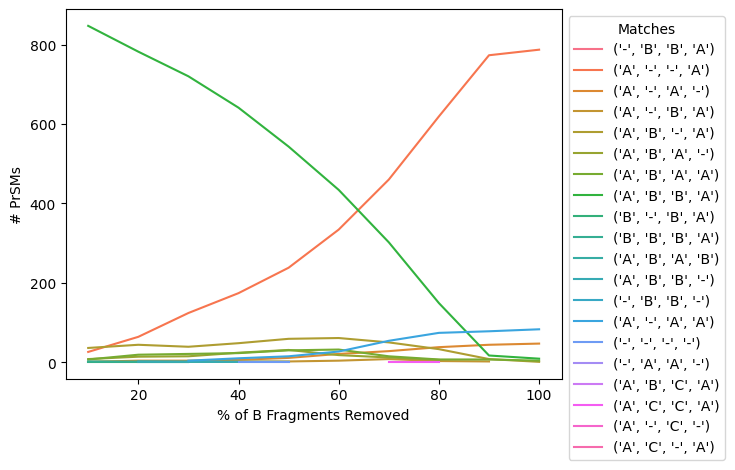

<Figure size 1000x600 with 0 Axes>

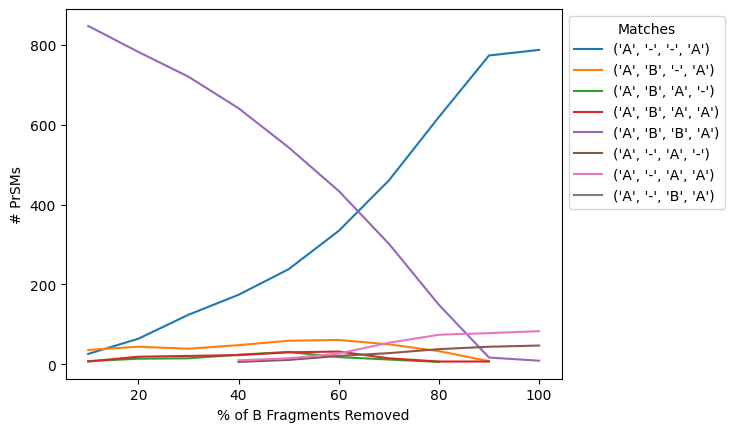

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/10%/Result.tsv", delimiter="\t")
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/20%/Result.tsv", delimiter="\t")
r3 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/30%/Result.tsv", delimiter="\t")
r4 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/40%/Result.tsv", delimiter="\t")
r5 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/50%/Result.tsv", delimiter="\t")
r6 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/60%/Result.tsv", delimiter="\t")
r7 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/70%/Result.tsv", delimiter="\t")
r8 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/80%/Result.tsv", delimiter="\t")
r9 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/90%/Result.tsv", delimiter="\t")
r10 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/Result.tsv", delimiter="\t")

df = pd.DataFrame(columns=["Matches", "% of B Fragments Removed", "# PrSMs"])

r1 = r1.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r1.groups.keys():
    df.loc[len(df)] = [key,10,len(r1.get_group(key))]

r2 = r2.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r2.groups.keys():
    df.loc[len(df)] = [key,20,len(r2.get_group(key))]

r3 = r3.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r3.groups.keys():
    df.loc[len(df)] = [key,30,len(r3.get_group(key))]

r4 = r4.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r4.groups.keys():
    df.loc[len(df)] = [key,40,len(r4.get_group(key))]

r5 = r5.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r5.groups.keys():
    df.loc[len(df)] = [key,50,len(r5.get_group(key))]

r6 = r6.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r6.groups.keys():
    df.loc[len(df)] = [key,60,len(r6.get_group(key))]

r7 = r7.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r7.groups.keys():
    df.loc[len(df)] = [key,70,len(r7.get_group(key))]

r8 = r8.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r8.groups.keys():
    df.loc[len(df)] = [key,80,len(r8.get_group(key))]

r9 = r9.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r9.groups.keys():
    df.loc[len(df)] = [key,90,len(r9.get_group(key))]

r10 = r10.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r10.groups.keys():
    df.loc[len(df)] = [key,100,len(r10.get_group(key))]

new_df = df[df['# PrSMs'] >= 5]


plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
sns.lineplot(data=df, x="% of B Fragments Removed", y="# PrSMs", hue="Matches")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
sns.lineplot(data=new_df, x="% of B Fragments Removed", y="# PrSMs", hue="Matches")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [55]:
import sys
import pandas as pd
import read_msalign

verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/noisetest/dataset2/200/"

result = pd.read_csv(dir + "20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

spec_list = read_msalign.read_spec_file(dir + "20231215_ecoli_400ng_daniel_1_ms2.msalign")

spec_dict = {}
for spec in spec_list:
    spec_dict[str(spec.header.spec_scan)] = spec

for index, row in result.iterrows():
    result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)

verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications"]], left_on='Scan(s)', right_on="Scan(s)", how='left', suffixes=("", "_True"))

finalResult = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Other"))

finalResult["Verified_ProteinCorrect"] = (finalResult["Protein accession"] == finalResult["Protein accession_True"])

finalResult["Verified_ProteinOther"] = (finalResult["Protein accession"] == finalResult["Protein accession_Other"])

finalResult["Group"] = ""

finalResult.loc[(finalResult["#unexpected modifications_True"] == 0) & (finalResult["#unexpected modifications_Other"] == 0), "Group"] = 0
finalResult.loc[(finalResult["#unexpected modifications_True"] == 0) & (finalResult["#unexpected modifications_Other"] == 1), "Group"] = 1
finalResult.loc[(finalResult["#unexpected modifications_True"] == 1) & (finalResult["#unexpected modifications_Other"] == 0), "Group"] = 2
finalResult.loc[(finalResult["#unexpected modifications_True"] == 1) & (finalResult["#unexpected modifications_Other"] == 1), "Group"] = 3

# print(len(finalResult))
# print(finalResult[finalResult["Verified_ProteinCorrect"] == True].shape[0] / len(finalResult) * 100)
# print(finalResult[finalResult["Verified_ProteinOther"] == True].shape[0] / len(finalResult) * 100)

g0 = finalResult[finalResult["Group"] == 0]
g1 = finalResult[finalResult["Group"] == 1]
g2 = finalResult[finalResult["Group"] == 2]
g3 = finalResult[finalResult["Group"] == 3]

print(len(g0))
print(g0[g0["Verified_ProteinCorrect"] == True].shape[0] / len(g0) * 100)
print(g0[g0["Verified_ProteinOther"] == True].shape[0] / len(g0) * 100)

print(len(g1))
print(g1[g1["Verified_ProteinCorrect"] == True].shape[0] / len(g1) * 100)
print(g1[g1["Verified_ProteinOther"] == True].shape[0] / len(g1) * 100)

print(len(g2))
print(g2[g2["Verified_ProteinCorrect"] == True].shape[0] / len(g2) * 100)
print(g2[g2["Verified_ProteinOther"] == True].shape[0] / len(g2) * 100)

print(len(g3))
print(g3[g3["Verified_ProteinCorrect"] == True].shape[0] / len(g3) * 100)
print(g3[g3["Verified_ProteinOther"] == True].shape[0] / len(g3) * 100)

144
93.05555555555556
6.944444444444445
129
93.7984496124031
6.2015503875969
85
87.05882352941177
11.76470588235294
97
92.78350515463917
7.216494845360824


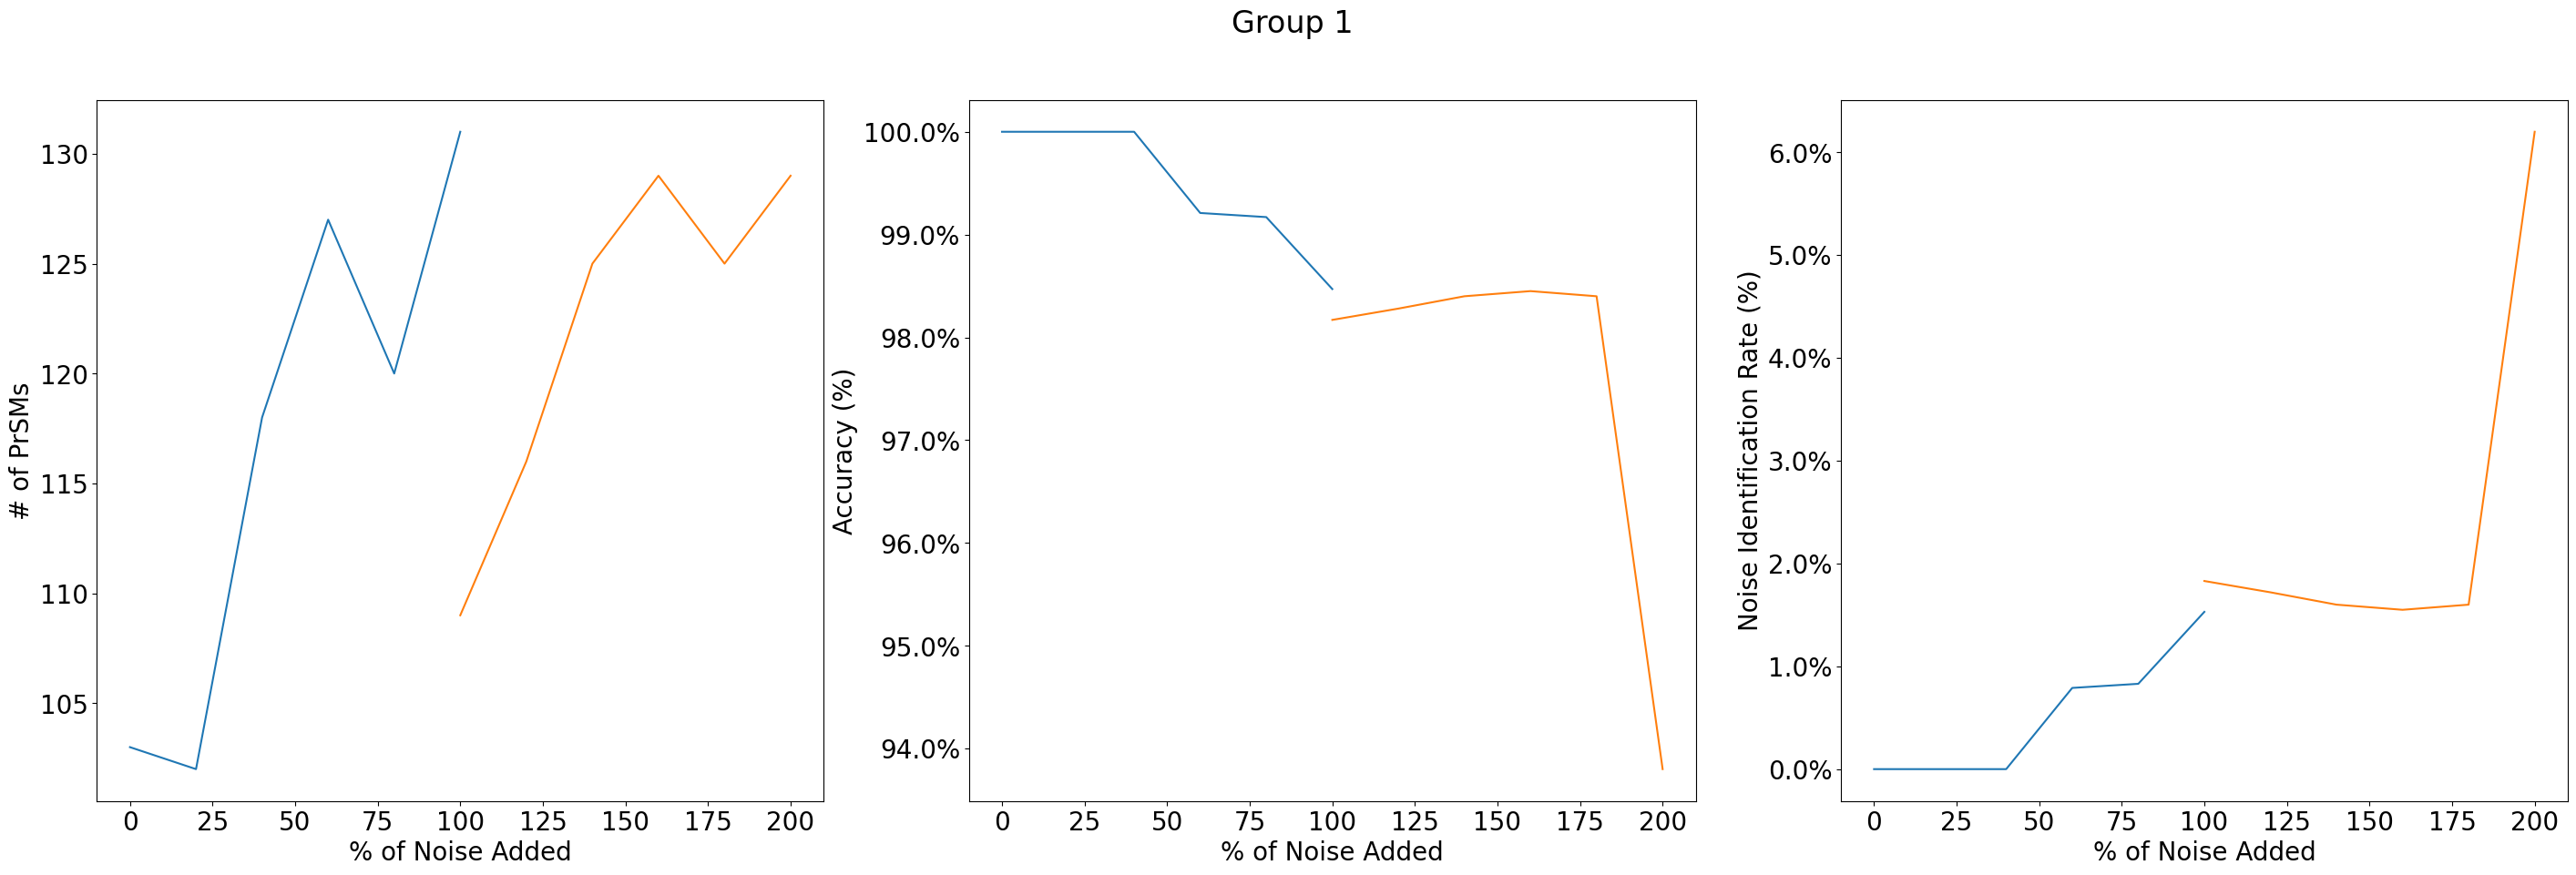

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

r1 = [632, 610, 595, 577, 568, 558]
r1a = [100, 100, 98.82, 99.48, 98.42, 97.13]
r1b = [0, 0, 1.18, 0.52, 1.58, 2.87]

r1g0 = [226, 225, 206, 192, 196, 182]
r1ag0 = [100, 100, 99.03, 100, 100, 98.35]
r1bg0 = [0, 0, 0.97, 0, 0, 1.65]

r1g1 = [103, 102, 118, 127, 120, 131]
r1ag1 = [100, 100, 100, 99.21, 99.17, 98.47]
r1bg1 = [0, 0, 0, 0.79, 0.83, 1.53]

r1g2 = [202, 176, 158, 147, 137, 125]
r1ag2 = [100, 100, 97.47, 99.32, 94.89, 93.6]
r1bg2 = [0, 0, 2.54, 0.68, 5.11, 6.4]

r1g3 = [101, 107, 113, 111, 115, 120]
r1ag3 = [100, 100, 99.12, 99.1, 99.13, 97.5]
r1bg3 = [0, 0, 0.88, 0.9, 0.87, 2.5]

r2 = [490, 464, 463, 455, 456, 455] #the rates for this is bad, since the noise peak obtained are essentially the same as we have more noise
r2a = [96.73, 96.12, 95.68, 94.29, 93.6, 92.09]
r2b = [3.27, 3.88, 4.32, 5.71, 6.36, 7.69]

r2g0 = [175, 160, 152, 145, 147, 144]
r2ag0 = [98.86, 95.63, 94.74, 94.48, 95.24, 93.06]
r2bg0 = [1.14, 4.38, 5.26, 5.52, 4.76, 6.95]

r2g1 = [109, 116, 125, 129, 125, 129]
r2ag1 = [98.17, 98.28, 98.4, 98.45, 98.4, 93.8]
r2bg1 = [1.83, 1.72, 1.6, 1.55, 1.6, 6.2]

r2g2 = [104, 96, 96, 96, 82, 85]
r2ag2 = [92.31, 90.63, 93.75, 87.5, 81.71, 87.06]
r2bg2 = [7.69, 9.38, 6.25, 12.5, 18.29, 11.74]

r2g3 = [102, 92, 90, 85, 102, 97]
r2ag3 = [96.08, 100, 95.56, 95.29, 95.1, 92.78]
r2bg3 = [3.92, 0, 4.44, 4.71, 4.9, 7.22]

df = pd.DataFrame()

df["% of Noise Added 1"] = [0, 20, 40, 60, 80, 100]
df["% of Noise Added 2"] = range(100, 210, 20)
df["# of PrSMs 1"] = r1g1
df["# of PrSMs 2"] = r2g1
df["Accuracy 1"] = r1ag1
df["Accuracy 2"] = r2ag1
df["False 1"] = r1bg1
df["False 2"] = r2bg1

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(35, 10))

plt.rcParams.update({'font.size': 20})


sns.lineplot(data=df, x="% of Noise Added 1", y="# of PrSMs 1", ax=ax0)
ax0.set_ylabel('# of PrSMs')
ax0.set_xlabel('% of Noise Added')

sns.lineplot(data=df, x="% of Noise Added 2", y="# of PrSMs 2", ax=ax0)

sns.lineplot(data=df, x="% of Noise Added 1", y="Accuracy 1", ax=ax1)
ax1.set_ylabel('Accuracy (%)')
ax1.set_xlabel('% of Noise Added')

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

sns.lineplot(data=df, x="% of Noise Added 2", y="Accuracy 2", ax=ax1)

sns.lineplot(data=df, x="% of Noise Added 1", y="False 1", ax=ax2)
ax2.set_ylabel('Noise Identification Rate (%)')
ax2.set_xlabel('% of Noise Added')

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

sns.lineplot(data=df, x="% of Noise Added 2", y="False 2", ax=ax2)
fig.suptitle('Group 1')
plt.savefig("noise.png")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.close()

<Figure size 900x1100 with 0 Axes>

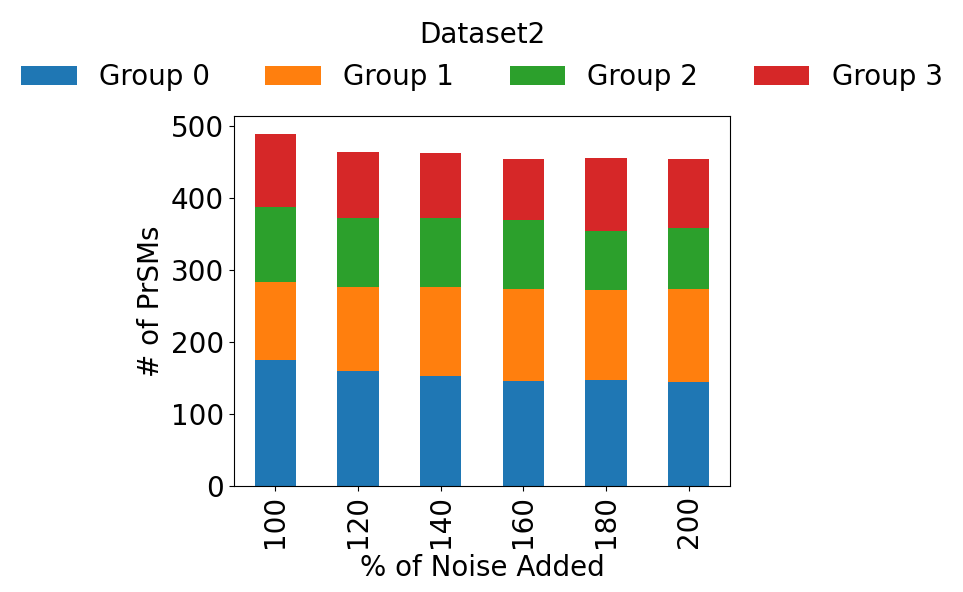

In [74]:
df = pd.DataFrame({'Group 0': r2g0,
                   'Group 1': r2g1,
                   'Group 2': r2g2,
                   'Group 3': r2g3},
                  index=range(100, 210, 20))

df.plot(kind='bar', stacked=True)
 
# labels for x & y axis
plt.xlabel('% of Noise Added')
plt.ylabel('# of PrSMs')

ax = plt.gca()

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title="Dataset2", frameon=False,
)

plt.savefig("noisegroups2.png")

In [9]:
import pandas as pd
import read_msalign

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/Result_resolved.tsv", sep="\t", index_col=0)

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved2_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

spec_list_1 = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved1_ms2.msalign")
spec_list_2 = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved2_ms2.msalign")

pairs = df["Pair"].tolist()

access1 = {}
for pair in pairs:
    for spec in spec_list_1:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == eval(pair):
            access1[pair] = int(spec.header.spec_scan)

access2 = {}
for pair in pairs:
    for spec in spec_list_2:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == eval(pair):
            access2[pair] = int(spec.header.spec_scan)

{'frozenset({1730, 2070})': 1730, 'frozenset({1937, 10158})': 1937, 'frozenset({2512, 2031})': 2031, 'frozenset({1754, 2139})': 1754, 'frozenset({8121, 2218})': 2218, 'frozenset({2229, 3183})': 2229, 'frozenset({2232, 2124})': 2232, 'frozenset({2237, 3183})': 2237, 'frozenset({2240, 9402})': 2240, 'frozenset({2124, 2253})': 2253, 'frozenset({9402, 2299})': 2299, 'frozenset({9402, 2301})': 2301, 'frozenset({9402, 2306})': 2306, 'frozenset({2314, 9414})': 2314, 'frozenset({2330, 9414})': 2330, 'frozenset({2345, 2223})': 2223, 'frozenset({2348, 4436})': 2348, 'frozenset({7602, 2363})': 2363, 'frozenset({6115, 2374})': 6115, 'frozenset({4436, 2390})': 2390, 'frozenset({9402, 2398})': 2398, 'frozenset({2425, 9402})': 2425, 'frozenset({2426, 8275})': 2426, 'frozenset({2432, 9402})': 2432, 'frozenset({2573, 2462})': 2462, 'frozenset({8275, 2467})': 2467, 'frozenset({2488, 9414})': 2488, 'frozenset({2504, 9402})': 2504, 'frozenset({8275, 2519})': 2519, 'frozenset({9402, 2530})': 2530, 'frozens

In [17]:
Evalue1 = []
for pair in pairs:
    print(r2[r2["Scan(s)"] == access2[pair]].iloc[0]["E-value"], pair)

1.170382e-08 frozenset({1730, 2070})
1.1129862e-08 frozenset({1937, 10158})
2.26448e-06 frozenset({2512, 2031})
4.05662e-09 frozenset({1754, 2139})
1.00042e-06 frozenset({8121, 2218})
1.862245e-09 frozenset({2229, 3183})
1.61771665e-11 frozenset({2232, 2124})
3.753145e-09 frozenset({2237, 3183})
2.628e-06 frozenset({2240, 9402})
4.5451167e-12 frozenset({2124, 2253})
1.05014e-06 frozenset({9402, 2299})
1.07976e-06 frozenset({9402, 2301})
3.429e-07 frozenset({9402, 2306})
6.036662e-05 frozenset({2314, 9414})
5.8555e-05 frozenset({2330, 9414})
1.129434e-10 frozenset({2345, 2223})
3.6418e-05 frozenset({2348, 4436})
2.945106e-07 frozenset({7602, 2363})
0.0005540252 frozenset({6115, 2374})
8.1148e-06 frozenset({4436, 2390})
1.28706e-06 frozenset({9402, 2398})
2.8968e-08 frozenset({2425, 9402})
0.000129514 frozenset({2426, 8275})
1.71008e-07 frozenset({2432, 9402})
1.063658e-05 frozenset({2573, 2462})
8.36418e-05 frozenset({8275, 2467})
7.39732101e-06 frozenset({2488, 9414})
4.942e-07 frozens

IndexError: single positional indexer is out-of-bounds

In [1]:
import pandas as pd
import read_msalign

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/Result_resolved.tsv", sep="\t", index_col=0)

result_a = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result_b = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved2_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

pairs = result["Pair"].tolist()

a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved1_ms2.msalign")
b_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved2_ms2.msalign")

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == eval(pair):
            accessA[pair] = spec.header.spec_scan

accessB = {}
for pair in pairs:
    for spec in b_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == eval(pair):
            accessB[pair] = spec.header.spec_scan

Evalue1 = []
Evalue2 = []
for pair in pairs:
    if result[result["Pair"] == pair].iloc[0]["choice"] == "A":
        Evalue1.append(result_a[result_a["Scan(s)"] == accessA[pair]].iloc[0]["E-value"])
        Evalue2.append(result_b[result_b["Scan(s)"] == accessA[pair]].iloc[0]["E-value"])
    else:
        Evalue1.append(result_a[result_a["Scan(s)"] == accessB[pair]].iloc[0]["E-value"])
        Evalue2.append(result_b[result_b["Scan(s)"] == accessB[pair]].iloc[0]["E-value"])

result["E-value1"] = Evalue1
result["E-value2"] = Evalue2


In [2]:
import numpy as np
result["LoggedDifference1"] = np.where(result["choice"] == "A", np.log(result["E-value1"]) - np.log(result["A+B_1 E-value"]), np.log(result["E-value1"]) - np.log(result["B+A_1 E-value"]))
result["LoggedDifference2"] = np.where(result["choice"] == "A", np.log(result["E-value2"]) - np.log(result["A+B_2 E-value"]), np.log(result["E-value2"]) - np.log(result["B+A_2 E-value"]))
display(result[result["LoggedDifference1"] > 0])
display(result[result["LoggedDifference2"] > 0])

,Pair,A+B_1,A+B_1 peaks,A+B_1 E-value,A+B_2,A+B_2 peaks,A+B_2 E-value,B+A_1,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2 peaks,B+A_2 E-value,choice,E-value1,E-value2,LoggedDifference1,LoggedDifference2


,Pair,A+B_1,A+B_1 peaks,A+B_1 E-value,A+B_2,A+B_2 peaks,A+B_2 E-value,B+A_1,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2 peaks,B+A_2 E-value,choice,E-value1,E-value2,LoggedDifference1,LoggedDifference2
92,"frozenset({7304, 3986})",B,20,1.040755e+00,DECOY,5,55.216049,B,15,0.000001,C,7,1.492240e+00,A,4.442953e-03,1.000000e+300,-5.456382,686.764274
93,"frozenset({7304, 3993})",B,23,8.655435e-01,DECOY,5,87.501731,B,15,0.000005,C,8,1.089040e+00,A,9.315608e-02,1.000000e+300,-2.229081,686.303869
346,"frozenset({9651, 2374})",A,22,5.663328e-04,C,6,0.703922,DECOY,5,3.599487,A,22,3.406032e-04,A,2.915141e-05,6.525186e+00,-2.966679,2.226757
458,"frozenset({5524, 2374})",A,37,1.736502e-12,DECOY,7,706.699320,-,0,1.000000,A,23,1.160500e-06,A,5.045600e-14,1.000000e+300,-3.538527,684.214923
655,"frozenset({10412, 6164})",A,39,6.953040e-12,DECOY,6,51.831440,-,0,1.000000,A,27,6.438420e-07,A,1.016442e-12,1.276778e+02,-1.922871,0.901513


In [8]:
display(result[(result["LoggedDifference2"] < result["LoggedDifference1"]) & (result["LoggedDifference1"] > -5)])


,Pair,A+B_1,A+B_1 peaks,A+B_1 E-value,A+B_2,A+B_2 peaks,A+B_2 E-value,B+A_1,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2 peaks,B+A_2 E-value,choice,E-value1,E-value2,LoggedDifference1,LoggedDifference2
0,"frozenset({1730, 2070})",A,12,1.221761e-07,B,8,3.818720e-07,B,8,1.499648e-06,A,12,1.221761e-07,A,8.429419e-08,6.797890e-08,-0.371151,-1.725888
1,"frozenset({1937, 10158})",A,35,5.540780e-17,B,13,1.007913e-06,-,0,1.000000e+00,A,15,2.532557e-08,A,3.026608e-17,3.323386e-09,-0.604693,-5.714653
2,"frozenset({2512, 2031})",A,19,2.280401e-12,B,7,2.109440e-05,B,7,4.607200e-04,A,19,1.894875e-12,A,9.749559e-13,1.125872e-06,-0.849714,-2.930450
3,"frozenset({1754, 2139})",A,8,8.560010e-07,B,7,1.934460e-09,B,7,4.305960e-09,A,8,7.965320e-08,B,1.199250e-09,1.095124e-08,-1.278304,-1.984230
4,"frozenset({8121, 2218})",A,38,1.350135e-20,B,6,4.344800e-04,-,0,1.000000e+00,A,26,1.239046e-11,A,2.119774e-21,1.576900e-06,-1.851480,-5.618689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,"frozenset({11260, 5254})",A,45,1.359072e-11,B,9,3.338000e-05,B,9,1.477540e-04,A,45,4.618891e-12,A,9.855120e-13,2.254577e-07,-2.623981,-4.997580
1319,"frozenset({5120, 2607})",A,62,2.486405e-15,B,12,3.558400e-06,-,0,1.000000e+00,A,45,9.060480e-10,A,1.001299e-16,1.112920e-08,-3.212125,-5.767494
1320,"frozenset({3090, 5127})",A,70,4.554792e-17,B,11,2.388800e-04,-,0,1.000000e+00,A,49,3.974731e-11,A,1.808717e-18,3.613400e-07,-3.226147,-6.493897
1321,"frozenset({5242, 11260})",A,57,4.691227e-14,B,7,9.100400e-04,-,0,1.000000e+00,A,42,7.730448e-09,A,7.520832e-15,1.771160e-06,-1.830603,-6.241854


<Figure size 640x480 with 0 Axes>

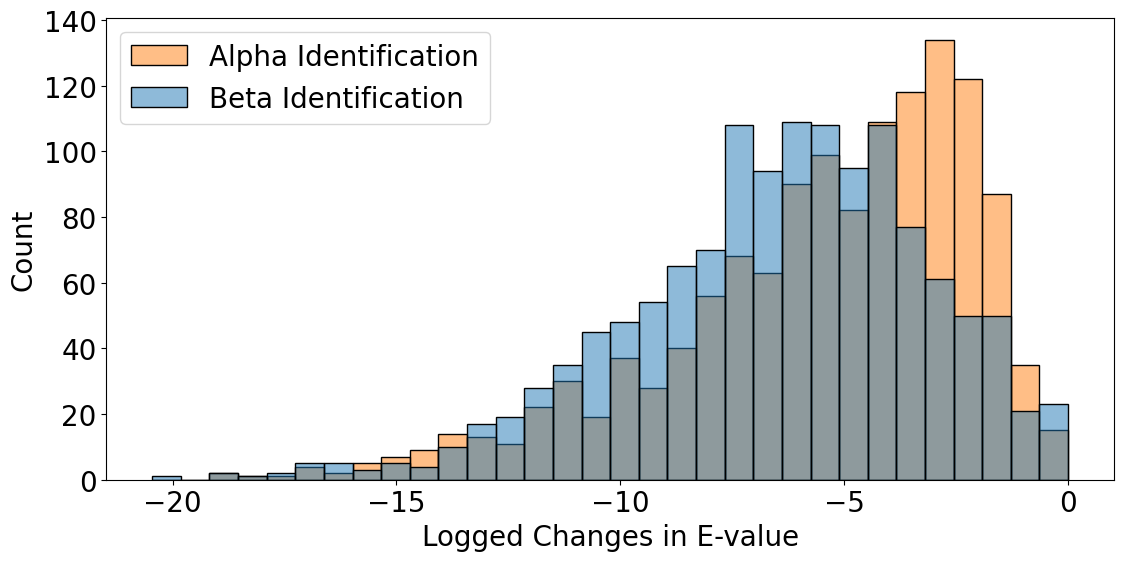

In [9]:
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

plt.clf()
result[result["LoggedDifference1"] > 0] = 0
result[result["LoggedDifference2"] > 0] = 0
differences1 = result["LoggedDifference1"].tolist()
differences2 = result["LoggedDifference2"].tolist()
plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 20})
sns.histplot([differences2, differences1])
plt.xlabel("Logged Changes in E-value")
plt.legend(["Alpha Identification", "Beta Identification"])

[0.1738410334124683,
 0.4400850616058671,
 0.09366420207443318,
 0.2924097029072314]

2.1007552922620834

3.2212004001657197

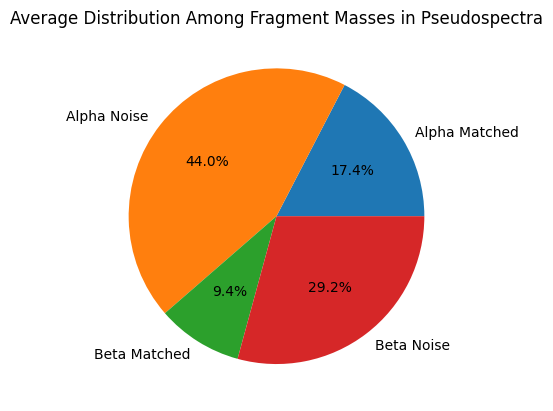

In [28]:
import read_msalign
import pandas as pd
from statistics import mean 
import matplotlib.pyplot as plt

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/temp_ms2_modified.msalign")

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", sep="\t")

amatch = []
anon = []
bmatch = []
bnon = []
for spec in spec_list:
    ascan = int(spec.header.spec_scan) % 100000
    bscan = int(spec.header.title) % 100000
    atotal = int(df[df["Scan(s)"] == ascan].iloc[0]["#peaks"])
    a = int(df[df["Scan(s)"] == ascan].iloc[0]["#matched peaks"])
    btotal = int(df[df["Scan(s)"] == bscan].iloc[0]["#peaks"])
    b = int(df[df["Scan(s)"] == bscan].iloc[0]["#matched peaks"])

    total = atotal + btotal
    amatch.append(a / total)
    anon.append((atotal - a) / total)
    bmatch.append(b / total)
    bnon.append((btotal - b) / total)


list = [mean(amatch), mean(anon), mean(bmatch), mean(bnon)]
display(list)
mylabels = ["Alpha Matched", "Alpha Noise", "Beta Matched", "Beta Noise"]

plt.pie(list, labels=mylabels, autopct='%1.1f%%')
plt.title("Average Distribution Among Fragment Masses in Pseudospectra")

x = mean(amatch) / mean(bmatch)
y = (mean(anon) + mean(bnon)) / (x + 1)

display((mean(amatch) / (x*y)) / mean(amatch))
display((mean(bmatch) / y) / (mean(bmatch) / (1 - mean(amatch))))

plt.savefig("piechart.png", dpi=1200)